# Predicting-Obesity-Rate-Bases-on-Food-Environment

## Imports 

In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyRegressor

## Problem Statement

The question we am seeking to answer is whether the number of healthy food stores available in each county can predict the obesity rate. We found data on food deserts from the United States Department of Agriculture. In order to see the relationships between a person's food environment and obesity, the data set consists of the availability of the number of grocery stores, fast food restaurants, and full-service restaurants. Look at which observations have the greatest impact on obesity rates. 

## EDA

The current version of the Food Environment Atlas has over 275 variables, including new indicators on access and proximity to a grocery store for sub populations; an indicator on the SNAP Combined Application Project for recipients of Supplemental Security Income (at the State level); and indicators on farmers' markets that report accepting credit cards or report selling baked and prepared food products

[Data Dictionary ](https://www.ers.usda.gov/webdocs/DataFiles/80526/archived_documentation_August2015.pdf?v=0)

In [2]:
#variable_list = pd.read_excel('../Data/DataDownload2015.xlsx',sheet_name='Variable Lookup')
#variable_list.head()

In [3]:
health = pd.read_excel('../Data/DataDownloadfull.xls',sheet_name='HEALTH')
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 14 columns):
FIPS                     3143 non-null int64
State                    3143 non-null object
County                   3143 non-null object
PCT_DIABETES_ADULTS08    3138 non-null float64
PCT_DIABETES_ADULTS13    3142 non-null float64
PCT_OBESE_ADULTS08       3138 non-null float64
PCT_OBESE_ADULTS13       3142 non-null float64
PCT_HSPA15               2025 non-null float64
RECFAC09                 3143 non-null int64
RECFAC14                 3143 non-null int64
PCH_RECFAC_09_14         3020 non-null float64
RECFACPTH09              3143 non-null float64
RECFACPTH14              3143 non-null float64
PCH_RECFACPTH_09_14      3020 non-null float64
dtypes: float64(9), int64(3), object(2)
memory usage: 343.9+ KB


PCT_obese_adults13 should be the y values on train that we are predicting

In [4]:
health.isnull().sum()

FIPS                        0
State                       0
County                      0
PCT_DIABETES_ADULTS08       5
PCT_DIABETES_ADULTS13       1
PCT_OBESE_ADULTS08          5
PCT_OBESE_ADULTS13          1
PCT_HSPA15               1118
RECFAC09                    0
RECFAC14                    0
PCH_RECFAC_09_14          123
RECFACPTH09                 0
RECFACPTH14                 0
PCH_RECFACPTH_09_14       123
dtype: int64

We will drop PCT_HSPA15, PCH_RECFAC_09_14, and PCH_RECFACPTH_09_14 More focused on the pct of obese adults.

In [5]:
health.drop(columns=['PCT_HSPA15', 'PCH_RECFAC_09_14','PCH_RECFACPTH_09_14', 'RECFACPTH09','RECFACPTH14'], inplace=True)

In [6]:
#drop the rest of the NA's
health.dropna(inplace=True)

In [7]:
health.isnull().sum()

FIPS                     0
State                    0
County                   0
PCT_DIABETES_ADULTS08    0
PCT_DIABETES_ADULTS13    0
PCT_OBESE_ADULTS08       0
PCT_OBESE_ADULTS13       0
RECFAC09                 0
RECFAC14                 0
dtype: int64

The local dataframe talks about the access to local produce either through a farmersmarket or a local farmer. 

In [8]:
pd.set_option('display.max_rows', 300)

In [9]:
acess = pd.read_excel('../Data/Acess_food.xlsx')

In [10]:
acess.head()

FIPS State   County  LACCESS_POP10  LACCESS_POP15  PCH_LACCESS_POP_10_15  \
0  1001    AL  Autauga   18428.439685   17496.693038              -5.056026   
1  1003    AL  Baldwin   35210.814078   30561.264430             -13.204891   
2  1005    AL  Barbour    5722.305602    6069.523628               6.067799   
3  1007    AL     Bibb    1044.867327     969.378841              -7.224696   
4  1009    AL   Blount    1548.175559    3724.428242             140.568857   

   PCT_LACCESS_POP10  PCT_LACCESS_POP15  LACCESS_LOWI10  LACCESS_LOWI15  ...  \
0          33.769657          32.062255     5344.427472     6543.676824  ...   
1          19.318473          16.767489     9952.144027     9886.831137  ...   
2          20.840972          22.105560     3135.676086     2948.790251  ...   
3           4.559753           4.230324      491.449066      596.162829  ...   
4           2.700840           6.497380      609.027708     1650.959482  ...   

   LACCESS_HISP15  PCT_LACCESS_HISP15  LACCESS_NHASIAN15  \
0      471.136164            0.863345          86.767975   
1     1377.874834            0.755973         212.946378   
2      509.377525            1.855183          17.096410   
3        8.596762            0.037516           1.994318   
4      497.489891            0.867886           8.428994   

   PCT_LACCESS_NHASIAN15  LACCESS_NHNA15  PCT_LACCESS_NHNA15  LACCESS_NHPI15  \
0               0.159000       61.169869            0.112092        8.817961   
1               0.116833      181.649648            0.099662       14.819634   
2               0.062266       39.960527            0.145539        8.082376   
3               0.008703        2.513097            0.010967        0.000000   
4               0.014705       28.938242            0.050484        1.062851   

   PCT_LACCESS_NHPI15  LACCESS_MULTIR15  PCT_LACCESS_MULTIR15  
0            0.016159        482.848633              0.884808  
1            0.008131       1127.696098              0.618712  
2            0.029436        462.382655              1.684025  
3            0.000000          5.259244              0.022951  
4            0.001854        202.914187              0.353990  

[5 rows x 44 columns]

In [11]:
acess.isnull().sum()

FIPS                          0
State                         0
County                        0
LACCESS_POP10                 0
LACCESS_POP15                19
PCH_LACCESS_POP_10_15        26
PCT_LACCESS_POP10             0
PCT_LACCESS_POP15            19
LACCESS_LOWI10                0
LACCESS_LOWI15               20
PCH_LACCESS_LOWI_10_15       28
PCT_LACCESS_LOWI10            0
PCT_LACCESS_LOWI15           20
LACCESS_HHNV10                0
LACCESS_HHNV15                3
PCH_LACCESS_HHNV_10_15       14
PCT_LACCESS_HHNV10            0
PCT_LACCESS_HHNV15            3
LACCESS_SNAP15               20
PCT_LACCESS_SNAP15           20
LACCESS_CHILD10               0
LACCESS_CHILD15              19
LACCESS_CHILD_10_15          28
PCT_LACCESS_CHILD10           0
PCT_LACCESS_CHILD15          19
LACCESS_SENIORS10             0
LACCESS_SENIORS15            19
PCH_LACCESS_SENIORS_10_15    26
PCT_LACCESS_SENIORS10         0
PCT_LACCESS_SENIORS15        19
LACCESS_WHITE15              19
PCT_LACC

In [12]:
# not a lot of null values so will drop those 
acess.shape

(3143, 44)

In [13]:
acess.dropna(inplace=True)

In [14]:
acess_stores = pd.read_excel('../Data/acesstostores.xlsx')

In [15]:
acess_stores.isnull().sum()

FIPS                     0
State                    0
County                   0
GROC09                   0
GROC14                   0
PCH_GROC_09_14          20
GROCPTH09                0
GROCPTH14                0
PCH_GROCPTH_09_14       15
SUPERC09                 0
SUPERC14                 0
PCH_SUPERC_09_14       140
SUPERCPTH09              0
SUPERCPTH14              0
PCH_SUPERCPTH_09_14    139
CONVS09                  0
CONVS14                  0
PCH_CONVS_09_14         24
CONVSPTH09               0
CONVSPTH14               0
PCH_CONVSPTH_09_14      19
SPECS09                  0
SPECS14                  0
PCH_SPECS_09_14        192
SPECSPTH09               0
SPECSPTH14               0
PCH_SPECSPTH_09_14     188
SNAPS12                  0
SNAPS16                 26
PCH_SNAPS_12_16         29
SNAPSPTH12               0
SNAPSPTH16              29
PCH_SNAPSPTH_12_16      32
WICS08                   0
WICS12                   0
PCH_WICS_08_12          19
WICSPTH08                0
W

We are going to drop rows with more than 100 missing values 

The rows that we will drop - PCH_SUPERC_09_14, PCH_SUPERCPTH_09_14, PCH_SUPERCPTH_09_14, PCH_SPECS_09_14, PCH_SPECS_09_14, PCH_SPECSPTH_09_14, 

In [16]:
acess_stores.drop(columns = ['PCH_SUPERC_09_14', 'PCH_SUPERCPTH_09_14', 'PCH_SUPERCPTH_09_14', 'PCH_SPECS_09_14', 'PCH_SPECSPTH_09_14'
                  ], inplace=True)

In [17]:
acess_stores.isnull().sum()

FIPS                   0
State                  0
County                 0
GROC09                 0
GROC14                 0
PCH_GROC_09_14        20
GROCPTH09              0
GROCPTH14              0
PCH_GROCPTH_09_14     15
SUPERC09               0
SUPERC14               0
SUPERCPTH09            0
SUPERCPTH14            0
CONVS09                0
CONVS14                0
PCH_CONVS_09_14       24
CONVSPTH09             0
CONVSPTH14             0
PCH_CONVSPTH_09_14    19
SPECS09                0
SPECS14                0
SPECSPTH09             0
SPECSPTH14             0
SNAPS12                0
SNAPS16               26
PCH_SNAPS_12_16       29
SNAPSPTH12             0
SNAPSPTH16            29
PCH_SNAPSPTH_12_16    32
WICS08                 0
WICS12                 0
PCH_WICS_08_12        19
WICSPTH08              0
WICSPTH12              0
PCH_WICSPTH_08_12     19
dtype: int64

In [18]:
acess_stores.shape

(3143, 35)

Then we will drop the other NA's since it's a small amount compared to the number of rows available

In [19]:
acess_stores.dropna(inplace=True)

In [20]:
acess_stores.isnull().sum()

FIPS                  0
State                 0
County                0
GROC09                0
GROC14                0
PCH_GROC_09_14        0
GROCPTH09             0
GROCPTH14             0
PCH_GROCPTH_09_14     0
SUPERC09              0
SUPERC14              0
SUPERCPTH09           0
SUPERCPTH14           0
CONVS09               0
CONVS14               0
PCH_CONVS_09_14       0
CONVSPTH09            0
CONVSPTH14            0
PCH_CONVSPTH_09_14    0
SPECS09               0
SPECS14               0
SPECSPTH09            0
SPECSPTH14            0
SNAPS12               0
SNAPS16               0
PCH_SNAPS_12_16       0
SNAPSPTH12            0
SNAPSPTH16            0
PCH_SNAPSPTH_12_16    0
WICS08                0
WICS12                0
PCH_WICS_08_12        0
WICSPTH08             0
WICSPTH12             0
PCH_WICSPTH_08_12     0
dtype: int64

In [21]:
df_obesity = pd.read_excel('../Data/obesity.xlsx')

In [22]:
df_obesity.head()

State   County  Male obesity prevalence, 2001 (%)  \
0  United States      NaN                               26.1   
1        Alabama      NaN                               29.7   
2        Alabama  Autauga                               30.7   
3        Alabama  Baldwin                               27.8   
4        Alabama  Barbour                               32.3   

   Female obesity prevalence, 2001 (%)  Male obesity prevalence, 2009 (%)  \
0                                 28.7                               32.8   
1                                 34.1                               36.1   
2                                 32.3                               35.9   
3                                 28.3                               32.4   
4                                 42.8                               40.3   

   Female obesity  prevalence, 2009 (%)  Male obesity  prevalence, 2011* (%)  \
0                                  35.1                                 33.8   
1                                  41.2                                 37.3   
2                                  37.4                                 37.1   
3                                  33.0                                 33.5   
4                                  51.3                                 41.5   

   Female obesity prevalence, 2011* (%)  \
0                                  36.1   
1                                  42.2   
2                                  38.8   
3                                  33.9   
4                                  51.6   

   Difference in male obesity prevalence, 2001-2009 (percentage points)  \
0                                                6.7                      
1                                                6.4                      
2                                                5.3                      
3                                                4.5                      
4                                                8.0                      

   Difference in female obesity prevalence, 2001-2009 (percentage points)  \
0                                                6.4                        
1                                                7.1                        
2                                                5.2                        
3                                                4.6                        
4                                                8.5                        

   Unnamed: 10  \
0          NaN   
1          NaN   
2          NaN   
3          NaN   
4          NaN   

   *Methodological changes in the 2011 BRFSS may affect comparability between the 2011 estimates and estimates from earlier years  
0                                                NaN                                                                               
1                                                NaN                                                                               
2                                                NaN                                                                               
3                                                NaN                                                                               
4                                                NaN

In [23]:
df_obesity.isnull().sum()

State                                                                                                                                0
County                                                                                                                              52
Male obesity prevalence, 2001 (%)                                                                                                    0
Female obesity prevalence, 2001 (%)                                                                                                  0
Male obesity prevalence, 2009 (%)                                                                                                    0
Female obesity  prevalence, 2009 (%)                                                                                                 0
Male obesity  prevalence, 2011* (%)                                                                                                  0
Female obesity prevalence, 2011* (%)                   

In [24]:
#drop the last two columns
df_obesity.drop(columns=['Unnamed: 10', '*Methodological changes in the 2011 BRFSS may affect comparability between the 2011 estimates and estimates from earlier years'], inplace=True)

In [25]:
df_obesity.dropna(inplace=True)

In [26]:
df_life_expectancy = pd.read_excel('../Data/Life_Expectancy.xlsx')

In [27]:
df_obesity.isnull().sum()

State                                                                     0
County                                                                    0
Male obesity prevalence, 2001 (%)                                         0
Female obesity prevalence, 2001 (%)                                       0
Male obesity prevalence, 2009 (%)                                         0
Female obesity  prevalence, 2009 (%)                                      0
Male obesity  prevalence, 2011* (%)                                       0
Female obesity prevalence, 2011* (%)                                      0
Difference in male obesity prevalence, 2001-2009 (percentage points)      0
Difference in female obesity prevalence, 2001-2009 (percentage points)    0
dtype: int64

In [28]:
df_life_expectancy.shape

(3194, 16)

In [29]:
df_life_expectancy.head()

State   County  Male life expectancy, 1985 (years)  \
0  United States      NaN                                70.8   
1        Alabama      NaN                                69.1   
2        Alabama  Autauga                                68.1   
3        Alabama  Baldwin                                71.1   
4        Alabama  Barbour                                66.8   

   Female life expectancy, 1985 (years)  Male life expectancy, 1990 (years)  \
0                                  77.8                                71.5   
1                                  76.9                                69.4   
2                                  77.0                                68.5   
3                                  78.8                                71.9   
4                                  76.0                                66.7   

   Female life expectancy, 1990 (years)  Male life expectancy, 1995 (years)  \
0                                  78.3                                72.5   
1                                  77.1                                69.9   
2                                  77.0                                69.3   
3                                  79.2                                72.4   
4                                  76.7                                68.4   

   Female life expectancy, 1995 (years)  Male life expectancy, 2000 (years)  \
0                                  78.8                                74.1   
1                                  77.2                                71.0   
2                                  77.3                                71.7   
3                                  79.3                                73.9   
4                                  76.9                                70.0   

   Female life expectancy, 2000 (years)  Male life expectancy, 2005 (years)  \
0                                  79.2                                74.9   
1                                  77.2                                71.5   
2                                  77.6                                72.5   
3                                  79.2                                73.8   
4                                  76.2                                70.5   

   Female life expectancy, 2005 (years)  Male life expectancy, 2010 (years)  \
0                                  79.9                                76.1   
1                                  77.3                                72.4   
2                                  77.4                                73.3   
3                                  79.7                                75.0   
4                                  77.0                                72.2   

   Female life expectancy, 2010 (years)  \
0                                  80.8   
1                                  77.8   
2                                  78.8   
3                                  80.3   
4                                  77.2   

   Difference in male life expectancy, 1985-2010 (years)  \
0                                                5.2       
1                                                3.3       
2                                                5.2       
3                                                3.8       
4                                                5.3       

   Difference in female life expectancy, 1985-2010 (years)  
0                                                3.0        
1                                                0.9        
2                                                1.8        
3                                                1.5        
4                                                1.1

In [30]:
df_life_expectancy.isnull().sum()

State                                                       0
County                                                     52
Male life expectancy, 1985 (years)                          0
Female life expectancy, 1985 (years)                        0
Male life expectancy, 1990 (years)                          0
Female life expectancy, 1990 (years)                        0
Male life expectancy, 1995 (years)                          0
Female life expectancy, 1995 (years)                        0
Male life expectancy, 2000 (years)                          0
Female life expectancy, 2000 (years)                        0
Male life expectancy, 2005 (years)                          0
Female life expectancy, 2005 (years)                        0
Male life expectancy, 2010 (years)                          0
Female life expectancy, 2010 (years)                        0
Difference in male life expectancy, 1985-2010 (years)       0
Difference in female life expectancy, 1985-2010 (years)     0
dtype: i

In [31]:
df_life_expectancy.dropna(inplace=True)

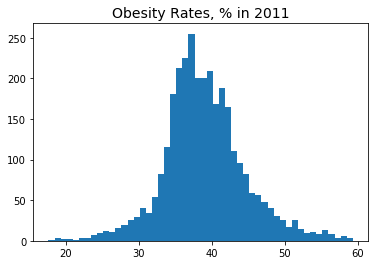

In [32]:
import matplotlib.pyplot as plt

plt.hist(df_obesity['Female obesity prevalence, 2011* (%)'],bins=50, )
plt.title('Obesity Rates, % in 2011', size = 14);

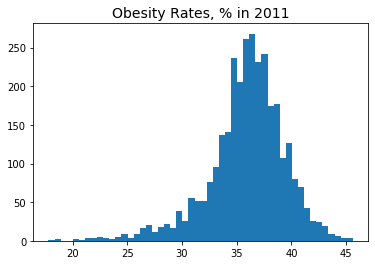

In [33]:
plt.hist(df_obesity['Male obesity prevalence, 2009 (%)'],bins=50, )
plt.title('Obesity Rates, % in 2011', size = 14);

States the highest percent of obesity Mississippu, Louisiana, and south Carolina. Mississipi appeared three times in the top five.

The top states for men are Kentucky, Mississippi, Louisiana, Ohio, and Texas.

In [34]:
health.columns

Index(['FIPS', 'State', 'County', 'PCT_DIABETES_ADULTS08',
       'PCT_DIABETES_ADULTS13', 'PCT_OBESE_ADULTS08', 'PCT_OBESE_ADULTS13',
       'RECFAC09', 'RECFAC14'],
      dtype='object')

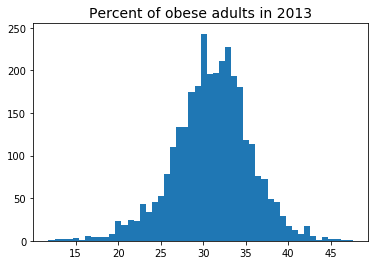

In [35]:
plt.hist(health['PCT_OBESE_ADULTS13'],bins=50, )
plt.title('Percent of obese adults in 2013', size = 14);

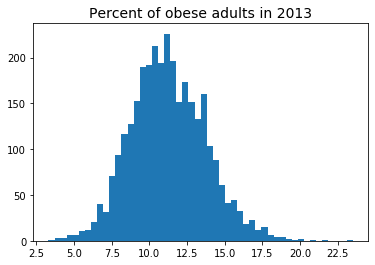

In [36]:
plt.hist(health['PCT_DIABETES_ADULTS13'],bins=50, )
plt.title('Percent of obese adults in 2013', size = 14);

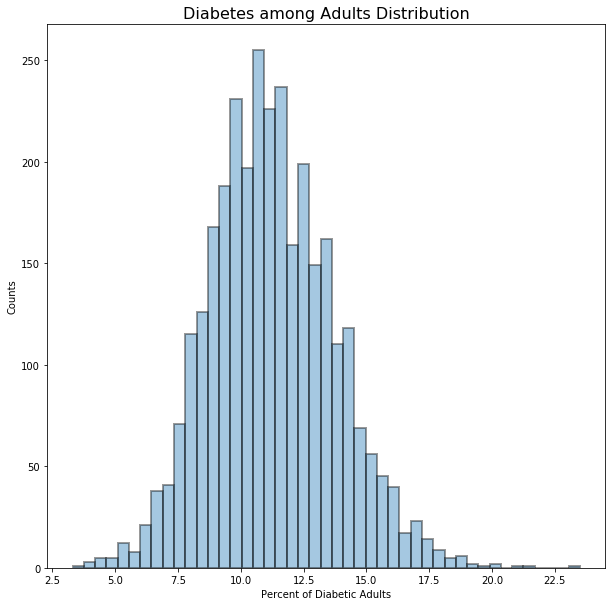

In [37]:
plt.figure(figsize=(10,10))

sns.distplot(health['PCT_DIABETES_ADULTS13'], kde = False, bins =45,hist_kws=dict(edgecolor="k", linewidth=2))
#plt.yticks(ticks = )
plt.xlabel('Percent of Diabetic Adults') 
plt.ylabel('Counts')
plt.title('Diabetes among Adults Distribution', fontsize = 16);

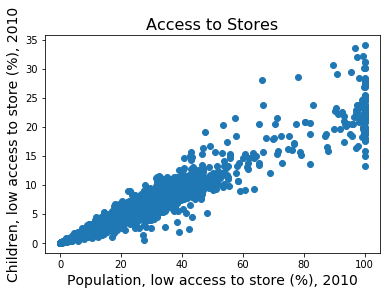

In [38]:
plt.scatter(acess.PCT_LACCESS_POP10, acess.PCT_LACCESS_CHILD10)
plt.xlabel('Population, low access to store (%), 2010',size = 14)
plt.ylabel('Children, low access to store (%), 2010',size = 14)
plt.title('Access to Stores', size=16);

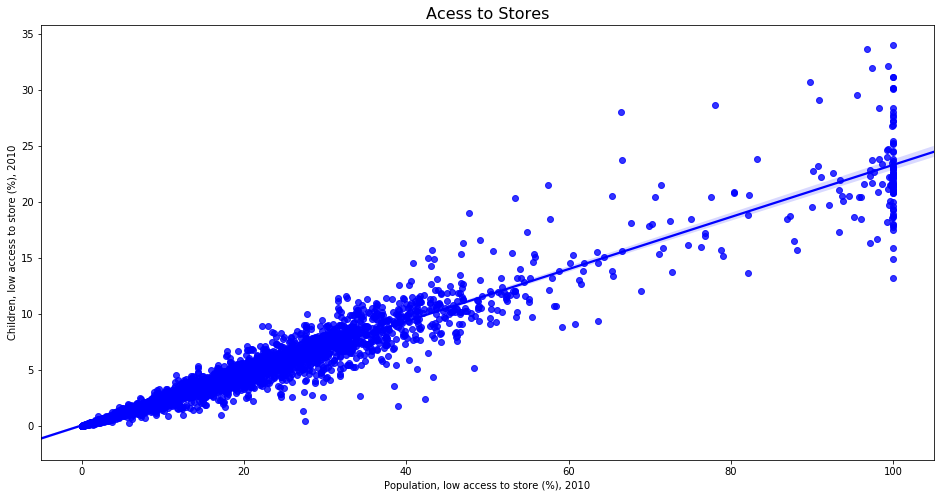

In [39]:
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.regplot(x='PCT_LACCESS_POP10', y='PCT_LACCESS_CHILD10', data=acess, color = 'b')
ax.set(xlabel='Population, low access to store (%), 2010', ylabel='Children, low access to store (%), 2010') 
plt.title('Acess to Stores', fontsize = 16);



This is very correlated

## Merging the Datasets

In [40]:
# merge health, df_obesity, df_1 and df_2

In [41]:
df_list = [health, df_obesity, df_life_expectancy, acess, acess_stores]

In [42]:
df = pd.merge(left = health, # name column follows the left table
    right = acess_stores,
        on = "FIPS")

In [43]:
df = pd.merge(left = df, # name column follows the left table
    right = acess,
        on = "FIPS")

In [44]:
df.columns

Index(['FIPS', 'State_x', 'County_x', 'PCT_DIABETES_ADULTS08',
       'PCT_DIABETES_ADULTS13', 'PCT_OBESE_ADULTS08', 'PCT_OBESE_ADULTS13',
       'RECFAC09', 'RECFAC14', 'State_y', 'County_y', 'GROC09', 'GROC14',
       'PCH_GROC_09_14', 'GROCPTH09', 'GROCPTH14', 'PCH_GROCPTH_09_14',
       'SUPERC09', 'SUPERC14', 'SUPERCPTH09', 'SUPERCPTH14', 'CONVS09',
       'CONVS14', 'PCH_CONVS_09_14', 'CONVSPTH09', 'CONVSPTH14',
       'PCH_CONVSPTH_09_14', 'SPECS09', 'SPECS14', 'SPECSPTH09', 'SPECSPTH14',
       'SNAPS12', 'SNAPS16', 'PCH_SNAPS_12_16', 'SNAPSPTH12', 'SNAPSPTH16',
       'PCH_SNAPSPTH_12_16', 'WICS08', 'WICS12', 'PCH_WICS_08_12', 'WICSPTH08',
       'WICSPTH12', 'PCH_WICSPTH_08_12', 'State', 'County', 'LACCESS_POP10',
       'LACCESS_POP15', 'PCH_LACCESS_POP_10_15', 'PCT_LACCESS_POP10',
       'PCT_LACCESS_POP15', 'LACCESS_LOWI10', 'LACCESS_LOWI15',
       'PCH_LACCESS_LOWI_10_15', 'PCT_LACCESS_LOWI10', 'PCT_LACCESS_LOWI15',
       'LACCESS_HHNV10', 'LACCESS_HHNV15', 'PCH_LACCESS

In [45]:
df.drop(columns=['State_y', 'County_y'], inplace=True)

In [46]:
df.isnull().sum()

FIPS                         0
State_x                      0
County_x                     0
PCT_DIABETES_ADULTS08        0
PCT_DIABETES_ADULTS13        0
PCT_OBESE_ADULTS08           0
PCT_OBESE_ADULTS13           0
RECFAC09                     0
RECFAC14                     0
GROC09                       0
GROC14                       0
PCH_GROC_09_14               0
GROCPTH09                    0
GROCPTH14                    0
PCH_GROCPTH_09_14            0
SUPERC09                     0
SUPERC14                     0
SUPERCPTH09                  0
SUPERCPTH14                  0
CONVS09                      0
CONVS14                      0
PCH_CONVS_09_14              0
CONVSPTH09                   0
CONVSPTH14                   0
PCH_CONVSPTH_09_14           0
SPECS09                      0
SPECS14                      0
SPECSPTH09                   0
SPECSPTH14                   0
SNAPS12                      0
SNAPS16                      0
PCH_SNAPS_12_16              0
SNAPSPTH

In [47]:
df.shape

(3026, 84)

In [48]:
df.dropna(inplace=True)

# EDA the Merged Dataset

In [49]:
df.columns

Index(['FIPS', 'State_x', 'County_x', 'PCT_DIABETES_ADULTS08',
       'PCT_DIABETES_ADULTS13', 'PCT_OBESE_ADULTS08', 'PCT_OBESE_ADULTS13',
       'RECFAC09', 'RECFAC14', 'GROC09', 'GROC14', 'PCH_GROC_09_14',
       'GROCPTH09', 'GROCPTH14', 'PCH_GROCPTH_09_14', 'SUPERC09', 'SUPERC14',
       'SUPERCPTH09', 'SUPERCPTH14', 'CONVS09', 'CONVS14', 'PCH_CONVS_09_14',
       'CONVSPTH09', 'CONVSPTH14', 'PCH_CONVSPTH_09_14', 'SPECS09', 'SPECS14',
       'SPECSPTH09', 'SPECSPTH14', 'SNAPS12', 'SNAPS16', 'PCH_SNAPS_12_16',
       'SNAPSPTH12', 'SNAPSPTH16', 'PCH_SNAPSPTH_12_16', 'WICS08', 'WICS12',
       'PCH_WICS_08_12', 'WICSPTH08', 'WICSPTH12', 'PCH_WICSPTH_08_12',
       'State', 'County', 'LACCESS_POP10', 'LACCESS_POP15',
       'PCH_LACCESS_POP_10_15', 'PCT_LACCESS_POP10', 'PCT_LACCESS_POP15',
       'LACCESS_LOWI10', 'LACCESS_LOWI15', 'PCH_LACCESS_LOWI_10_15',
       'PCT_LACCESS_LOWI10', 'PCT_LACCESS_LOWI15', 'LACCESS_HHNV10',
       'LACCESS_HHNV15', 'PCH_LACCESS_HHNV_10_15', 'PCT_LACC

In [50]:
#predicting the 13 obesity rate, drop year after
col_list = [col for col in df.columns if '15' in col]
df.drop(col_list, axis=1, inplace=True)

In [51]:
col_list_2 = [col for col in df.columns if '14' in col]
df.drop(col_list_2, axis=1, inplace=True)

In [52]:
col_list_3 = [col for col in df.columns if '16' in col]
df.drop(col_list_3, axis=1, inplace=True)

In [53]:
df.columns

Index(['FIPS', 'State_x', 'County_x', 'PCT_DIABETES_ADULTS08',
       'PCT_DIABETES_ADULTS13', 'PCT_OBESE_ADULTS08', 'PCT_OBESE_ADULTS13',
       'RECFAC09', 'GROC09', 'GROCPTH09', 'SUPERC09', 'SUPERCPTH09', 'CONVS09',
       'CONVSPTH09', 'SPECS09', 'SPECSPTH09', 'SNAPS12', 'SNAPSPTH12',
       'WICS08', 'WICS12', 'PCH_WICS_08_12', 'WICSPTH08', 'WICSPTH12',
       'PCH_WICSPTH_08_12', 'State', 'County', 'LACCESS_POP10',
       'PCT_LACCESS_POP10', 'LACCESS_LOWI10', 'PCT_LACCESS_LOWI10',
       'LACCESS_HHNV10', 'PCT_LACCESS_HHNV10', 'LACCESS_CHILD10',
       'PCT_LACCESS_CHILD10', 'LACCESS_SENIORS10', 'PCT_LACCESS_SENIORS10'],
      dtype='object')

In [54]:
df.columns

Index(['FIPS', 'State_x', 'County_x', 'PCT_DIABETES_ADULTS08',
       'PCT_DIABETES_ADULTS13', 'PCT_OBESE_ADULTS08', 'PCT_OBESE_ADULTS13',
       'RECFAC09', 'GROC09', 'GROCPTH09', 'SUPERC09', 'SUPERCPTH09', 'CONVS09',
       'CONVSPTH09', 'SPECS09', 'SPECSPTH09', 'SNAPS12', 'SNAPSPTH12',
       'WICS08', 'WICS12', 'PCH_WICS_08_12', 'WICSPTH08', 'WICSPTH12',
       'PCH_WICSPTH_08_12', 'State', 'County', 'LACCESS_POP10',
       'PCT_LACCESS_POP10', 'LACCESS_LOWI10', 'PCT_LACCESS_LOWI10',
       'LACCESS_HHNV10', 'PCT_LACCESS_HHNV10', 'LACCESS_CHILD10',
       'PCT_LACCESS_CHILD10', 'LACCESS_SENIORS10', 'PCT_LACCESS_SENIORS10'],
      dtype='object')

In [55]:
correlation = df.corr()[['PCT_OBESE_ADULTS13']].head(10)
sorted_coefs = abs(correlation).sort_values('PCT_OBESE_ADULTS13', ascending = False)
    
strong_corr = sorted_coefs[(sorted_coefs['PCT_OBESE_ADULTS13'] > .1)]

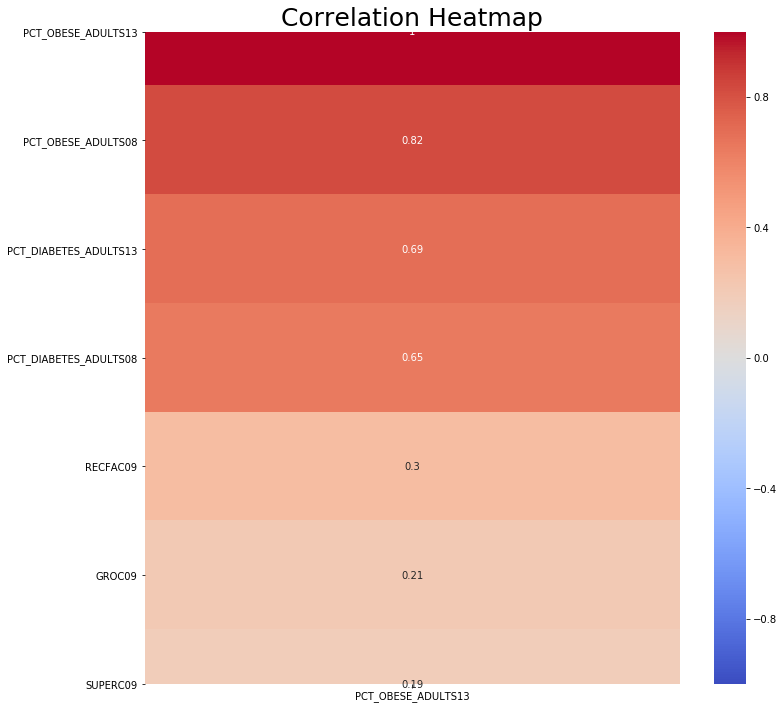

In [56]:
fig, ax = plt.subplots(figsize=(12,12)) 
ax = sns.heatmap(strong_corr,cmap= 'coolwarm',
           vmin=-1,
           vmax=1,
           annot=True)
plt.title('Correlation Heatmap', fontsize = 25);

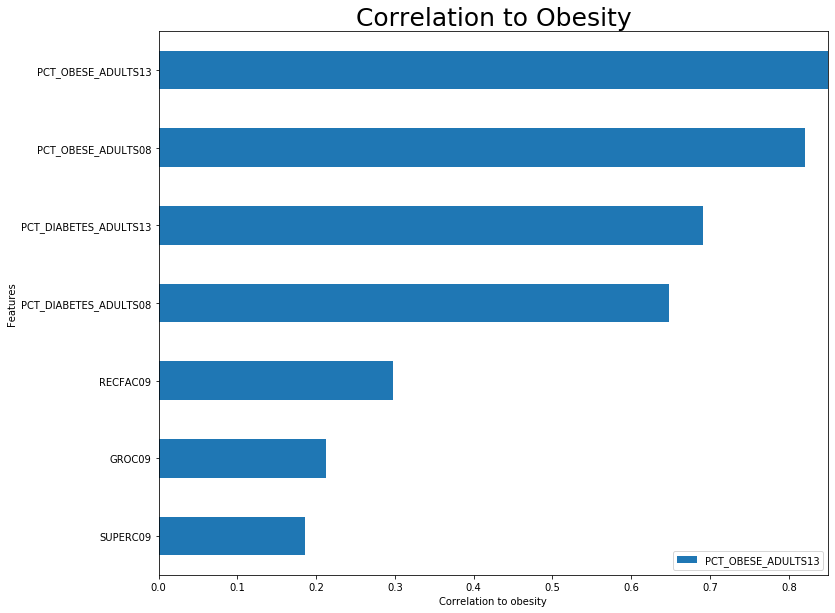

In [57]:
ax = strong_corr.head(15).plot(kind='barh', figsize = (12,10))
ax.set(ylabel='Features', xlabel='Correlation to obesity') 
ax.invert_yaxis()
plt.title('Correlation to Obesity', fontsize = 25);

## Preprocessing

In [58]:
df.columns

Index(['FIPS', 'State_x', 'County_x', 'PCT_DIABETES_ADULTS08',
       'PCT_DIABETES_ADULTS13', 'PCT_OBESE_ADULTS08', 'PCT_OBESE_ADULTS13',
       'RECFAC09', 'GROC09', 'GROCPTH09', 'SUPERC09', 'SUPERCPTH09', 'CONVS09',
       'CONVSPTH09', 'SPECS09', 'SPECSPTH09', 'SNAPS12', 'SNAPSPTH12',
       'WICS08', 'WICS12', 'PCH_WICS_08_12', 'WICSPTH08', 'WICSPTH12',
       'PCH_WICSPTH_08_12', 'State', 'County', 'LACCESS_POP10',
       'PCT_LACCESS_POP10', 'LACCESS_LOWI10', 'PCT_LACCESS_LOWI10',
       'LACCESS_HHNV10', 'PCT_LACCESS_HHNV10', 'LACCESS_CHILD10',
       'PCT_LACCESS_CHILD10', 'LACCESS_SENIORS10', 'PCT_LACCESS_SENIORS10'],
      dtype='object')

In [60]:
# I need to drop rows with over 200 null values!
pd.set_option('display.max_rows', 200)
df.isnull().sum()

FIPS                     0
State_x                  0
County_x                 0
PCT_DIABETES_ADULTS08    0
PCT_DIABETES_ADULTS13    0
PCT_OBESE_ADULTS08       0
PCT_OBESE_ADULTS13       0
RECFAC09                 0
GROC09                   0
GROCPTH09                0
SUPERC09                 0
SUPERCPTH09              0
CONVS09                  0
CONVSPTH09               0
SPECS09                  0
SPECSPTH09               0
SNAPS12                  0
SNAPSPTH12               0
WICS08                   0
WICS12                   0
PCH_WICS_08_12           0
WICSPTH08                0
WICSPTH12                0
PCH_WICSPTH_08_12        0
State                    0
County                   0
LACCESS_POP10            0
PCT_LACCESS_POP10        0
LACCESS_LOWI10           0
PCT_LACCESS_LOWI10       0
LACCESS_HHNV10           0
PCT_LACCESS_HHNV10       0
LACCESS_CHILD10          0
PCT_LACCESS_CHILD10      0
LACCESS_SENIORS10        0
PCT_LACCESS_SENIORS10    0
dtype: int64

## Multicollinearity

In [61]:
corr=df.iloc[:,:-1].corr()

In [62]:
# check for correlation 
corr = df.corr()
corr['PCT_OBESE_ADULTS13'].sort_values(ascending=False).head(10)

PCT_OBESE_ADULTS13       1.000000
PCT_OBESE_ADULTS08       0.821190
PCT_DIABETES_ADULTS13    0.691162
PCT_DIABETES_ADULTS08    0.648299
SNAPSPTH12               0.308744
PCT_LACCESS_HHNV10       0.298537
CONVSPTH09               0.168556
SUPERCPTH09              0.078380
WICSPTH08                0.065577
WICSPTH12                0.047263
Name: PCT_OBESE_ADULTS13, dtype: float64

In [63]:
corr = pd.DataFrame(corr)

In [64]:
corr.head()

FIPS  PCT_DIABETES_ADULTS08  PCT_DIABETES_ADULTS13  \
FIPS                   1.000000               0.017404              -0.038185   
PCT_DIABETES_ADULTS08  0.017404               1.000000               0.857698   
PCT_DIABETES_ADULTS13 -0.038185               0.857698               1.000000   
PCT_OBESE_ADULTS08     0.005310               0.723933               0.688402   
PCT_OBESE_ADULTS13    -0.040508               0.648299               0.691162   

                       PCT_OBESE_ADULTS08  PCT_OBESE_ADULTS13  RECFAC09  \
FIPS                             0.005310           -0.040508 -0.051804   
PCT_DIABETES_ADULTS08            0.723933            0.648299 -0.191461   
PCT_DIABETES_ADULTS13            0.688402            0.691162 -0.220418   
PCT_OBESE_ADULTS08               1.000000            0.821190 -0.277665   
PCT_OBESE_ADULTS13               0.821190            1.000000 -0.297827   

                         GROC09  GROCPTH09  SUPERC09  SUPERCPTH09  ...  \
FIPS                  -0.043635  -0.012840 -0.034268     0.006282  ...   
PCT_DIABETES_ADULTS08 -0.109922  -0.032712 -0.150640     0.015725  ...   
PCT_DIABETES_ADULTS13 -0.132464  -0.059878 -0.177922     0.019708  ...   
PCT_OBESE_ADULTS08    -0.188724  -0.072025 -0.167591     0.063605  ...   
PCT_OBESE_ADULTS13    -0.212822  -0.077832 -0.186353     0.078380  ...   

                       LACCESS_POP10  PCT_LACCESS_POP10  LACCESS_LOWI10  \
FIPS                       -0.042382           0.044901       -0.036495   
PCT_DIABETES_ADULTS08      -0.172797          -0.151558       -0.114634   
PCT_DIABETES_ADULTS13      -0.207251          -0.181043       -0.151601   
PCT_OBESE_ADULTS08         -0.220511          -0.113933       -0.143941   
PCT_OBESE_ADULTS13         -0.248412          -0.128940       -0.168734   

                       PCT_LACCESS_LOWI10  LACCESS_HHNV10  PCT_LACCESS_HHNV10  \
FIPS                             0.016687       -0.024463           -0.079863   
PCT_DIABETES_ADULTS08            0.004709       -0.051321            0.321583   
PCT_DIABETES_ADULTS13           -0.024050       -0.082413            0.315142   
PCT_OBESE_ADULTS08               0.031179       -0.104281            0.349003   
PCT_OBESE_ADULTS13               0.010433       -0.135437            0.298537   

                       LACCESS_CHILD10  PCT_LACCESS_CHILD10  \
FIPS                         -0.032644             0.040314   
PCT_DIABETES_ADULTS08        -0.172561            -0.156798   
PCT_DIABETES_ADULTS13        -0.208262            -0.194315   
PCT_OBESE_ADULTS08           -0.206182            -0.076171   
PCT_OBESE_ADULTS13           -0.234485            -0.097689   

                       LACCESS_SENIORS10  PCT_LACCESS_SENIORS10  
FIPS                           -0.063701               0.064777  
PCT_DIABETES_ADULTS08          -0.153813              -0.078629  
PCT_DIABETES_ADULTS13          -0.178219              -0.086076  
PCT_OBESE_ADULTS08             -0.243685              -0.131699  
PCT_OBESE_ADULTS13             -0.260289              -0.121553  

[5 rows x 32 columns]

## Feature Selection

- which features should be included
- which features should be dropped 

In [74]:
# dummy variables 

In [75]:
df.dtypes

FIPS                       int64
State_x                   object
County_x                  object
PCT_DIABETES_ADULTS08    float64
PCT_DIABETES_ADULTS13    float64
PCT_OBESE_ADULTS08       float64
PCT_OBESE_ADULTS13       float64
RECFAC09                   int64
GROC09                     int64
GROCPTH09                float64
SUPERC09                   int64
SUPERCPTH09              float64
CONVS09                    int64
CONVSPTH09               float64
SPECS09                    int64
SPECSPTH09               float64
SNAPS12                  float64
SNAPSPTH12               float64
WICS08                     int64
WICS12                     int64
PCH_WICS_08_12           float64
WICSPTH08                float64
WICSPTH12                float64
PCH_WICSPTH_08_12        float64
State                     object
County                    object
LACCESS_POP10            float64
PCT_LACCESS_POP10        float64
LACCESS_LOWI10           float64
PCT_LACCESS_LOWI10       float64
LACCESS_HH

In [76]:
list_of_cols_to_dummy = ['State', 'County', 'State_x', 'County_x']

In [77]:
df = pd.get_dummies(df, columns = list_of_cols_to_dummy, drop_first = True)

## Modelling

# Regression Metrics Function

In [78]:
def regression_metrics(y,preds):
    sq_diff = (y-preds)**2 
    SSE = np.sum(sq_diff)
    MSE = metrics.mean_squared_error(y,preds)
    RMSE = np.sqrt(MSE)
    MAE = metrics.mean_absolute_error(y,preds)
    r2 = metrics.r2_score(y,preds)
    n= y.shape[0]
    p = len(features)
    r2_adj =  1 - (((n-1)/(n-(p+1))))*(1-r2)
    print(f'This is SSE: {SSE}')
    print(f'This is MSE: {MSE}')
    print(f'This is RMSE: {RMSE}')
    print(f'This is MAE: {MAE}')
    print(f'This is r2: {r2}')
    print(f'This is r2_adj: {r2_adj}')

# Train/Test Split

In [79]:
df.columns

Index(['FIPS', 'PCT_DIABETES_ADULTS08', 'PCT_DIABETES_ADULTS13',
       'PCT_OBESE_ADULTS08', 'PCT_OBESE_ADULTS13', 'RECFAC09', 'GROC09',
       'GROCPTH09', 'SUPERC09', 'SUPERCPTH09',
       ...
       'County_x_Yellowstone', 'County_x_Yoakum', 'County_x_Yolo',
       'County_x_York', 'County_x_Young', 'County_x_Yuba',
       'County_x_Yukon-Koyukuk', 'County_x_Yuma', 'County_x_Zapata',
       'County_x_Zavala'],
      dtype='object', length=3664)

In [80]:
X = df.drop(columns = ['PCT_OBESE_ADULTS13'])

In [81]:
y = df['PCT_OBESE_ADULTS13']

In [82]:
y.shape

(3026,)

In [83]:
#X_train.to_csv("data_train.csv")

In [84]:
#X_test.to_csv("data_test.csv")

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = .33,
                                                    random_state=22)

## Baseline Model

In [86]:
# baseline for a linear regression model

base_mean = DummyRegressor(strategy = 'mean')

base_mean.fit(X_train, y_train)

y_hat_base_train = base_mean.predict(X_train)
y_hat_base_test = base_mean.predict(X_test)


In [87]:
np.sqrt(mean_squared_error(y_train, y_hat_base_train))

4.453446838711558

In [88]:
np.sqrt(mean_squared_error(y_test, y_hat_base_test))

4.622503430576777

## Linear Regression Model

In [89]:
# features will be what is correlated to sales price after the feature engineering
correlation = df.corr()[['PCT_OBESE_ADULTS13']]
    
sorted_coefs = abs(correlation).sort_values('PCT_OBESE_ADULTS13', ascending = False)
    
strong_corr = sorted_coefs[(sorted_coefs['PCT_OBESE_ADULTS13'] > .1)]

In [90]:
strong_corr.drop(['PCT_OBESE_ADULTS13'], axis=1)

Empty DataFrame
Columns: []
Index: [PCT_OBESE_ADULTS13, PCT_OBESE_ADULTS08, PCT_DIABETES_ADULTS13, PCT_DIABETES_ADULTS08, State_CO, State_x_CO, SNAPSPTH12, PCT_LACCESS_HHNV10, RECFAC09, LACCESS_SENIORS10, LACCESS_POP10, SPECS09, LACCESS_CHILD10, State_x_CA, State_CA, GROC09, State_x_MS, State_MS, CONVS09, SUPERC09, SPECSPTH09, SNAPS12, State_x_AR, State_AR, WICS12, LACCESS_LOWI10, CONVSPTH09, State_x_LA, State_LA, State_x_AL, State_AL, WICS08, State_TX, State_x_TX, State_NM, State_x_NM, State_x_KY, State_KY, LACCESS_HHNV10, PCT_LACCESS_POP10, PCH_WICS_08_12, State_x_WV, State_WV, PCT_LACCESS_SENIORS10, State_OK, State_x_OK, State_x_MA, State_MA, State_x_NY, State_NY, State_x_SC, State_SC, State_x_MT, State_MT, State_x_UT, State_UT]

In [91]:
strong_corr.index

Index(['PCT_OBESE_ADULTS13', 'PCT_OBESE_ADULTS08', 'PCT_DIABETES_ADULTS13',
       'PCT_DIABETES_ADULTS08', 'State_CO', 'State_x_CO', 'SNAPSPTH12',
       'PCT_LACCESS_HHNV10', 'RECFAC09', 'LACCESS_SENIORS10', 'LACCESS_POP10',
       'SPECS09', 'LACCESS_CHILD10', 'State_x_CA', 'State_CA', 'GROC09',
       'State_x_MS', 'State_MS', 'CONVS09', 'SUPERC09', 'SPECSPTH09',
       'SNAPS12', 'State_x_AR', 'State_AR', 'WICS12', 'LACCESS_LOWI10',
       'CONVSPTH09', 'State_x_LA', 'State_LA', 'State_x_AL', 'State_AL',
       'WICS08', 'State_TX', 'State_x_TX', 'State_NM', 'State_x_NM',
       'State_x_KY', 'State_KY', 'LACCESS_HHNV10', 'PCT_LACCESS_POP10',
       'PCH_WICS_08_12', 'State_x_WV', 'State_WV', 'PCT_LACCESS_SENIORS10',
       'State_OK', 'State_x_OK', 'State_x_MA', 'State_MA', 'State_x_NY',
       'State_NY', 'State_x_SC', 'State_SC', 'State_x_MT', 'State_MT',
       'State_x_UT', 'State_UT'],
      dtype='object')

In [92]:
strong_corr_2 = strong_corr.drop(['PCT_OBESE_ADULTS13','PCT_OBESE_ADULTS08' ])

In [93]:
features = list(strong_corr_2.index)

In [94]:


X= df.drop(columns = ['PCT_OBESE_ADULTS13','PCT_OBESE_ADULTS08', 'FIPS'])
y = df['PCT_OBESE_ADULTS13']

In [95]:
X.columns

Index(['PCT_DIABETES_ADULTS08', 'PCT_DIABETES_ADULTS13', 'RECFAC09', 'GROC09',
       'GROCPTH09', 'SUPERC09', 'SUPERCPTH09', 'CONVS09', 'CONVSPTH09',
       'SPECS09',
       ...
       'County_x_Yellowstone', 'County_x_Yoakum', 'County_x_Yolo',
       'County_x_York', 'County_x_Young', 'County_x_Yuba',
       'County_x_Yukon-Koyukuk', 'County_x_Yuma', 'County_x_Zapata',
       'County_x_Zavala'],
      dtype='object', length=3661)

In [96]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [97]:
X_test.shape

(999, 3663)

In [98]:
y_test.shape

(999,)

In [99]:
X_train.shape

(2027, 3663)

In [100]:
y_train.shape

(2027,)

In [101]:
lr.score(X_train, y_train)

0.925023208323412

In [102]:
lr.coef_

array([-8.21762778e-04,  2.99834758e-02,  5.90664285e-01, ...,
        0.00000000e+00, -1.85798202e+00, -9.66979812e-01])

In [103]:
lr.score(X_test, y_test)

0.5716563893304014

In [104]:
model_1 = lr.predict(X_train)

In [105]:
model_2 = lr.predict(X_test)

This model is extremeley overfit

In [106]:
regression_metrics(y_train,model_1)

This is SSE: 3014.2075009096225
This is MSE: 1.4870288608335582
This is RMSE: 1.219437928241351
This is MAE: 0.6689102370968671
This is r2: 0.925023208323412
This is r2_adj: 0.9229700913099558


In [107]:
regression_metrics(y_test,model_2)

This is SSE: 9143.365532268246
This is MSE: 9.152518050318564
This is RMSE: 3.0253128846978066
This is MAE: 2.245543886450611
This is r2: 0.5716563893304014
This is r2_adj: 0.5471536827878609


In [108]:
#lr_df_coeff = pd.DataFrame({
    #'column':df.drop(columns = ['PCT_OBESE_ADULTS13','PCT_OBESE_ADULTS08', 'FIPS']),
    #'coef': lasso.coef_,
    #'abs_coef': np.abs(lr.coef_)

In [109]:
#ax = lr_df_coeff.set_index('column').head(15).sort_values(by = 'abs_coef', ascending = False).plot(kind = 'barh', figsize = (12,10))
#ax.set(xlabel='Value Added', ylabel='Features') 
#ax.invert_yaxis()
#plt.title('Value added by Feature', fontsize = 25);

## Lasso and Ridge

In [110]:
from sklearn.preprocessing import StandardScaler

In [111]:
#scaling to conduct ridge and lasso
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [112]:
from sklearn.linear_model import Lasso

In [113]:
from sklearn.linear_model import LassoCV

# PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [ ]:
pca = PCA()